In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel(r'831/Team_Project/Credit Canada Data.xlsx',index_col=0,sheet_name='Dataset')
df1= pd.read_excel(r'831/Team_Project/cleaned3.xlsx')

In [24]:
df['duration_of_dcp_years']=df['duration_of_dcp']/12

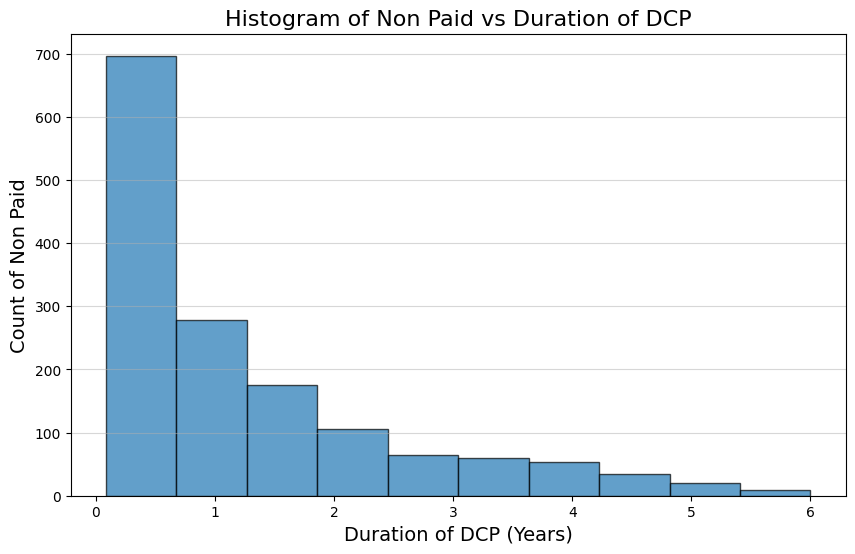

In [25]:
import matplotlib.pyplot as plt

# Filter the DataFrame for "Non Paid" status
non_paid_data = df[df['DCP_drop_status'] == 'Non Payment']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_paid_data['duration_of_dcp_years'], bins=10, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Duration of DCP (Years)', fontsize=14)
plt.ylabel('Count of Non Paid', fontsize=14)
plt.title('Histogram of Non Paid vs Duration of DCP', fontsize=16)

# Show the plot
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
df1['age at dcp']= df1['age_at_activation']+df1['duration_of_dcp']

In [21]:
df1[['age_at_activation', 'monthly_income_at_activation']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age_at_activation             3122 non-null   int64  
 1   monthly_income_at_activation  3122 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 48.9 KB


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[['age_at_activation', 'monthly_income_at_activation']] = scaler.fit_transform(df1[['age_at_activation', 'monthly_income_at_activation']])

# Check the normalized data
print(df1[['age_at_activation', 'monthly_income_at_activation']].head())

   age_at_activation  monthly_income_at_activation
0           0.579710                      0.105949
1           0.637681                      0.047460
2           0.202899                      0.093416
3           0.246377                      0.224390
4           0.289855                      0.161765


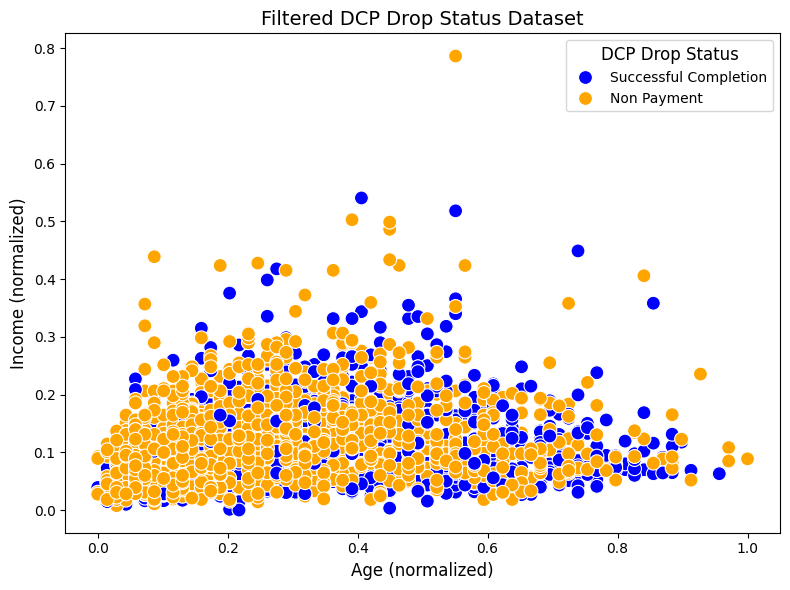

In [23]:
# Filter to include only the desired statuses
filtered_df = df1[df1['DCP_drop_status'].isin(['Successful Completion', 'Non Payment'])]

# Plot the scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(
    data=filtered_df, 
    x='age_at_activation', 
    y='monthly_income_at_activation', 
    hue='DCP_drop_status',  # Color by the target column
    palette={'Successful Completion': 'blue', 'Non Payment': 'orange'},  # Define colors
    s=100  # Marker size
)

# Add plot title and axis labels
plt.title("Filtered DCP Drop Status Dataset", fontsize=14)
plt.xlabel("Age (normalized)", fontsize=12)
plt.ylabel("Income (normalized)", fontsize=12)

# Display the legend and the plot
plt.legend(title="DCP Drop Status", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
successful_completion_count = (
    df[df['DCP_drop_status']=='Successful Completion']
    .groupby('province_at_activation')
    .size()
    .reset_index(name='SuccessfulCompletions')
)

total_counts = df.groupby('province_at_activation').size().reset_index(name='Total')
success_rates=successful_completion_count.merge(total_counts,on='province_at_activation')
success_rates['SuccessRate']=(success_rates['SuccessfulCompletions'])/success_rates['Total']*100

print(success_rates)

   province_at_activation  SuccessfulCompletions  Total  SuccessRate
0                      AB                     45    147    30.612245
1                      BC                     62    149    41.610738
2                      MB                     11     39    28.205128
3                      NB                     10     34    29.411765
4                      NL                      4     21    19.047619
5                      NS                     16     46    34.782609
6                      ON                   1045   2649    39.448849
7                      PE                      5      9    55.555556
8                      QC                     42     54    77.777778
9                      SK                      9     31    29.032258
10                     YK                      2      3    66.666667


In [30]:
successful_completion_count_city = (
    df[df['DCP_drop_status']=='Successful Completion']
    .groupby('city_at_activation')
    .size()
    .reset_index(name='SuccessfulCompletionsCity')
)

total_counts_city = df.groupby('city_at_activation').size().reset_index(name='Total')
success_rates_city=successful_completion_count_city.merge(total_counts_city,on='city_at_activation')
success_rates_city['SuccessRateCity']=(success_rates_city['SuccessfulCompletionsCity'])/success_rates_city['Total']*100

success_rates_city = success_rates_city.sort_values(by='SuccessfulCompletionsCity', ascending=False)

print(success_rates_city)

    city_at_activation  SuccessfulCompletionsCity  Total  SuccessRateCity
176            TORONTO                        138    310        44.516129
18            BRAMPTON                         65    158        41.139241
156        SCARBOROUGH                         61    148        41.216216
126             OTTAWA                         56    149        37.583893
103        MISSISSAUGA                         45    124        36.290323
..                 ...                        ...    ...              ...
59          GEORGETOWN                          1      3        33.333333
37           COURTENAY                          1      2        50.000000
134        PIERREFONDS                          1      1       100.000000
38           CRANBROOK                          1      4        25.000000
66         Guelph West                          1      3        33.333333

[209 rows x 4 columns]


In [34]:
# Assuming df is your DataFrame

# Count the number of DCPs per city
dcps_per_city = (
    df.groupby('city_at_activation')
    .size()
    .reset_index(name='NumberOfDCPs')
)

# Sort by the number of DCPs in descending order (optional)
dcps_per_city = dcps_per_city.sort_values(by='NumberOfDCPs', ascending=False)

# Display the result
dcps_per_city.head(30)

,city_at_activation,NumberOfDCPs
256,TORONTO,310
24,BRAMPTON,158
175,OTTAWA,149
222,SCARBOROUGH,148
281,WINDSOR,126
146,MISSISSAUGA,124
294,YORK,96
12,BARRIE,93
227,ST CATHARINES,86
70,ETOBICOKE,84


In [ ]:

# Calculate counts for each province
province_counts = df['province_at_activation'].value_counts()

# Calculate percentage for each province
province_percentages = (province_counts / province_counts.sum()) * 100

# Combine counts and percentages into a single DataFrame
province_stats = pd.DataFrame({
    'Count': province_counts,
    'Percentage': province_percentages
}).reset_index().rename(columns={'index': 'Province'})

# Display the result
print(province_stats)

   province_at_activation  Count  Percentage
0                      ON   2649   83.118921
1                      BC    149    4.675243
2                      AB    147    4.612488
3                      QC     54    1.694383
4                      NS     46    1.443364
5                      MB     39    1.223721
6                      NB     34    1.066834
7                      SK     31    0.972702
8                      NL     21    0.658927
9                      PE      9    0.282397
10                NU & NT      5    0.156887
11                     YK      3    0.094132


In [36]:
# Group by 'city_at_activation' and calculate the average debt
average_debt_per_city = (
    df.groupby('city_at_activation')['DCP_debt_balance_at_activation']
    .mean()
    .reset_index()
    .rename(columns={'DCP_debt_balance_at_activation': 'Average Debt'})
)

# Sort the results from highest to lowest
average_debt_per_city = average_debt_per_city.sort_values(by='Average Debt', ascending=False)

# Display the results
print(average_debt_per_city)


    city_at_activation  Average Debt
275         WETASKIWIN     112173.17
156              NAVAN     107788.00
77   FORT SASKATCHEWAN     105398.16
211            RUSSELL      81257.90
178         PARKSVILLE      65208.97
..                 ...           ...
214      SAINT-GEORGES       1633.95
274     WEST VANCOUVER       1567.19
58        DAWSON CREEK       1022.34
190     PORT HAWKSBURY        759.00
57             DAUPHIN        600.37

[295 rows x 2 columns]


In [37]:
df['average_debt_per_city'].head(10)

KeyError: 'average_debt_per_city'

In [38]:
# Group by city_at_activation and include province_at_activation
average_debt_per_city = (
    df.groupby(['city_at_activation', 'province_at_activation'])['DCP_debt_balance_at_activation']
    .mean()
    .reset_index()
    .rename(columns={'DCP_debt_balance_at_activation': 'Average Debt'})
)

# Sort the results by average debt (highest to lowest)
average_debt_per_city = average_debt_per_city.sort_values(by='Average Debt', ascending=False)

# Display the top 20 results
top_20_cities = average_debt_per_city.head(20)
print("Top 20 Cities by Average Debt with Provinces:")
print(top_20_cities)

Top 20 Cities by Average Debt with Provinces:
       city_at_activation province_at_activation  Average Debt
276            WETASKIWIN                     AB  112173.17000
157                 NAVAN                     ON  107788.00000
78      FORT SASKATCHEWAN                     AB  105398.16000
212               RUSSELL                     ON   81257.90000
179            PARKSVILLE                     BC   65208.97000
43               COALDALE                     AB   60100.00000
102             INGERSOLL                     ON   59369.57000
48   CONCEPTION BAY SOUTH                     NL   55134.05000
233           STONY PLAIN                     AB   53354.94000
216          SAINT-JEROME                     QC   50938.45500
270                VERNON                     BC   47926.27375
94            Guelph East                     ON   47415.12000
4                 AIRDRIE                     AB   45677.99500
256                TORBAY                     NL   45575.43500
241      

In [39]:
import pandas as pd

# Group by city_at_activation and province_at_activation, and calculate average debt
average_debt_per_city = (
    df.groupby(['city_at_activation', 'province_at_activation'])['DCP_debt_balance_at_activation']
    .mean()
    .reset_index()
    .rename(columns={'DCP_debt_balance_at_activation': 'Average Debt'})
)

# Filter for provinces ON, BC, and AB
filtered_data = average_debt_per_city[average_debt_per_city['province_at_activation'].isin(['ON', 'BC', 'AB'])]

# Sort the filtered data by average debt (highest to lowest)
filtered_data = filtered_data.sort_values(by='Average Debt', ascending=False)

# Display the top 20 results
top_20_cities = filtered_data.head(20)
print("Top 20 Cities by Average Debt (Filtered for Provinces ON, BC, AB):")
print(top_20_cities)


Top 20 Cities by Average Debt (Filtered for Provinces ON, BC, AB):
    city_at_activation province_at_activation  Average Debt
276         WETASKIWIN                     AB  112173.17000
157              NAVAN                     ON  107788.00000
78   FORT SASKATCHEWAN                     AB  105398.16000
212            RUSSELL                     ON   81257.90000
179         PARKSVILLE                     BC   65208.97000
43            COALDALE                     AB   60100.00000
102          INGERSOLL                     ON   59369.57000
233        STONY PLAIN                     AB   53354.94000
270             VERNON                     BC   47926.27375
94         Guelph East                     ON   47415.12000
4              AIRDRIE                     AB   45677.99500
226       SMITHS FALLS                     ON   43114.57000
112          KING CITY                     ON   39901.82500
246        SYLVAN LAKE                     AB   39276.38000
153   Middlesex County           

In [40]:

# Group by province_at_activation and calculate average debt
average_debt_per_province = (
    df.groupby('province_at_activation')['DCP_debt_balance_at_activation']
    .mean()
    .reset_index()
    .rename(columns={'DCP_debt_balance_at_activation': 'Average Debt'})
)

# Sort the results by average debt (highest to lowest)
average_debt_per_province = average_debt_per_province.sort_values(by='Average Debt', ascending=False)

# Display the results
print("Average Debt Per Province (Sorted):")
print(average_debt_per_province)


Average Debt Per Province (Sorted):
   province_at_activation  Average Debt
11                     YK  26153.130000
4                      NL  23513.457619
2                      MB  19907.312564
0                      AB  19214.374286
1                      BC  18561.618725
9                      QC  17888.386296
10                     SK  17756.118710
5                      NS  16130.660217
7                      ON  16055.386459
6                 NU & NT  15709.710000
3                      NB  15237.180294
8                      PE  14643.958889


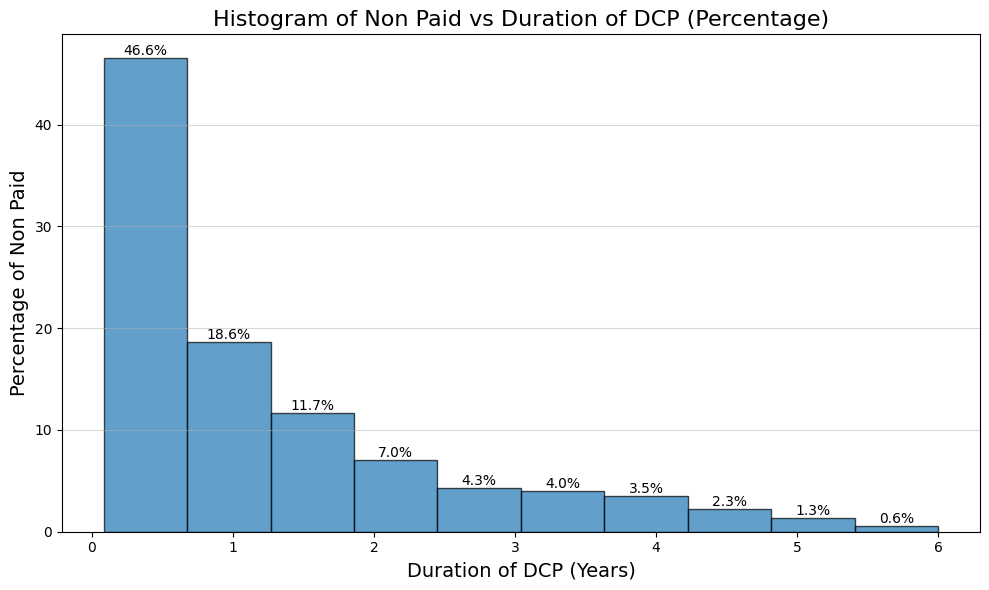

In [41]:

# Filter the DataFrame for "Non Paid" status
non_paid_data = df[df['DCP_drop_status'] == 'Non Payment']

# Plot the histogram as percentages
plt.figure(figsize=(10, 6))

# Calculate histogram data
counts, bins, patches = plt.hist(
    non_paid_data['duration_of_dcp_years'], 
    bins=10, 
    edgecolor='black', 
    alpha=0.7, 
    weights=[100 / len(non_paid_data)] * len(non_paid_data)  # Normalize to percentages
)

# Add labels and title
plt.xlabel('Duration of DCP (Years)', fontsize=14)
plt.ylabel('Percentage of Non Paid', fontsize=14)
plt.title('Histogram of Non Paid vs Duration of DCP (Percentage)', fontsize=16)

# Annotate each bar with the percentage
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2, 
        height, 
        f'{height:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Show the plot
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
